# Кредитный скоринг

# Содержание
* Задача кредитного скоринга
* Метрики бинарной задачи классификации
* Проблема переобучения и схемы валидации
* Логистическая регрессия

# Кредит

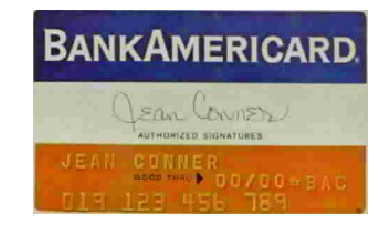

* Заявитель заполняет анкету
* Банк принимает решение
* Клиент пользуется кредитом
* Клиент возвращает долг или не возвращает

# Специфика задачи кредитного скоринга

* Классы “good” и “bad” неразделимы
* Предсказание поведения человека
* Долгосрочное прогнозирование
* Большая цена ошибки

# История кредитного скоринга



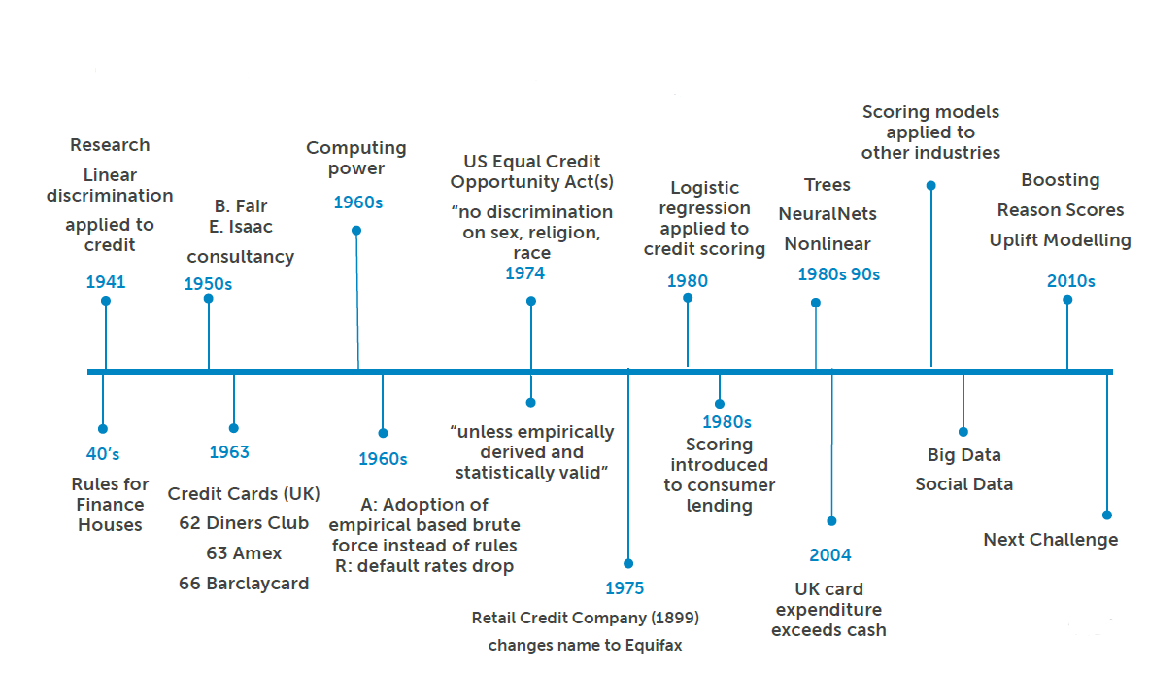

# Дополнительные сервисы

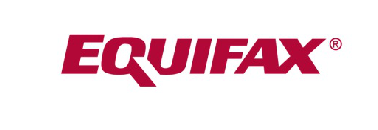

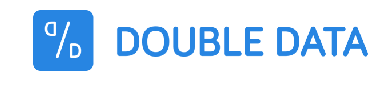

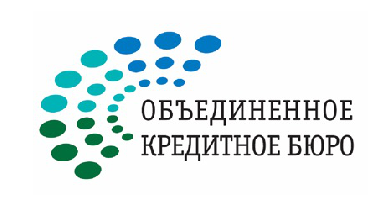

* Автоматизация процесса принятия решения
* Решение принимается за секунды
* Используется множество источников информации
* Сформирован рынок продажи информации для банков

# Примеры задач

* Application scoring
* Behavior scoring
* Collection scoring
* Marketing
* Churn analysis

# Формализация задачи

* Конечная выборка размера n.
* $X_i$ – вектор признаков.
* $y_i$ – бинарная целевая переменная.
* $(X_i, y_i)$ - независимые одинаково распределенные наблюдения.
* Необходимо найти функцию $S(X) ≃ \mathbb{P}(y = 1| X)$

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_rows = 10
np.random.seed(42)
rows, features = 5, 7

data = pd.DataFrame(np.random.randn(rows, features) * 100, columns=['X%s' % i for i in range(features)]).round()
data['X6'] = data['X6'] * 1000
data['X5'] = np.random.choice(['M', 'F'], size=rows)
data['y'] = np.random.randint(0, 2, size=rows)

In [2]:
data

,X0,X1,X2,X3,X4,X5,X6,y
0,50.0,-14.0,65.0,152.0,-23.0,F,158000.0,1
1,77.0,-47.0,54.0,-46.0,-47.0,F,-191000.0,1
2,-172.0,-56.0,-101.0,31.0,-91.0,F,147000.0,0
3,-23.0,7.0,-142.0,-54.0,11.0,F,38000.0,0
4,-60.0,-29.0,-60.0,185.0,-1.0,F,82000.0,1


# Метрики качества

Сведем задачу поиска функции $S(X) ≃ \mathbb{P}(y = 1| X)$ к задаче оптимизации.

* MSE (Mean square error)
* logloss (log-Likelihood)
* AUC (Area under the ROC curve)
* IV (Information Value)

# Среднеквадратичное отклонение
* MSE (Mean square error)  
  $\mathbb{E}[(y - S(X))^2]$

* Оптимальное значение  
  $S(X) = \mathbb{P}(y = 1| X)$

* Оценка  
  $\frac{1}{n}\sum_{i=1}^n[(y_i - S(X_i))^2]$

# Правдоподобие

* logloss (log-Likelihood)  
  $logloss = -\mathbb{E}[y \ln(S(X)) + (1-y)\ln(1 - S(X))]$

* Оптимальное значение  
  $S(X) = \mathbb{P}(y = 1| X)$

* Оценка  
  $\frac{1}{n}\sum_{i=1}^n[y_i \ln(S(X_i)) + (1-y_i)\ln(1 - S(X_i))]$

# Свойства Правдоподобия

* Если искомая зависимость принадлежит заранее известному классу функций, то оценка в максимума правдоподобия в этом классе обладает свойствами несмещенности, состоятельности и эффективности.  
  $\theta_{MML} = argmin_{\theta}(logloss(y, S(X, \theta)))$
  
* Добавление “бесполезных” степеней свободы в класс функции уменьшает оптимальное значение logloss-а на случайную величину, распределенную пропорцианально $\chi^2$. Это позволяет проверять гипотезы о бесполезности наборов признаков.  
  $2n[\hat{logloss}(\hat{\theta_1}) - \hat{logloss}(\hat{\theta_2, \hat{\alpha}})] \sim \chi^2(dim(\alpha))$

# AUC

* AUC (Area under the ROC curve)  
  $$AUC = \mathbb{P}(S(X_1) > S(X_2)\; |\; y_1 = 1, y_2 = 0) +\\ \frac{1}{2}\mathbb{P}(S(X_1) = S(X_2)\; |\; y_1 = 1, y_2 = 0)$$

* Оптимальное значение уже неоднозначно, но содержит искомую зависимость.  
  $S(X) = \mathbb{P}(y = 1| X)$

* Оценка  
  $$\frac{\sum_{y_i=1 ,y_j=0}[S(X_i) > S(X_j)] + \frac{1}{2}\sum_{y_i=1 ,y_j=0}[S(X_i) = S(X_j)]} {\sum[y_i = 1]\sum[y_i = 0]}$$

# Свойства AUC
* Не меняется при неубывающем преобразовании скор балла  
  ${AUC}_{f(S)} = {AUC}_{S},$ если $f(S)$ - строго возрастающая функция
* Ограничена 0, 1.

# Receiver Operating Characteristic ROC-curve

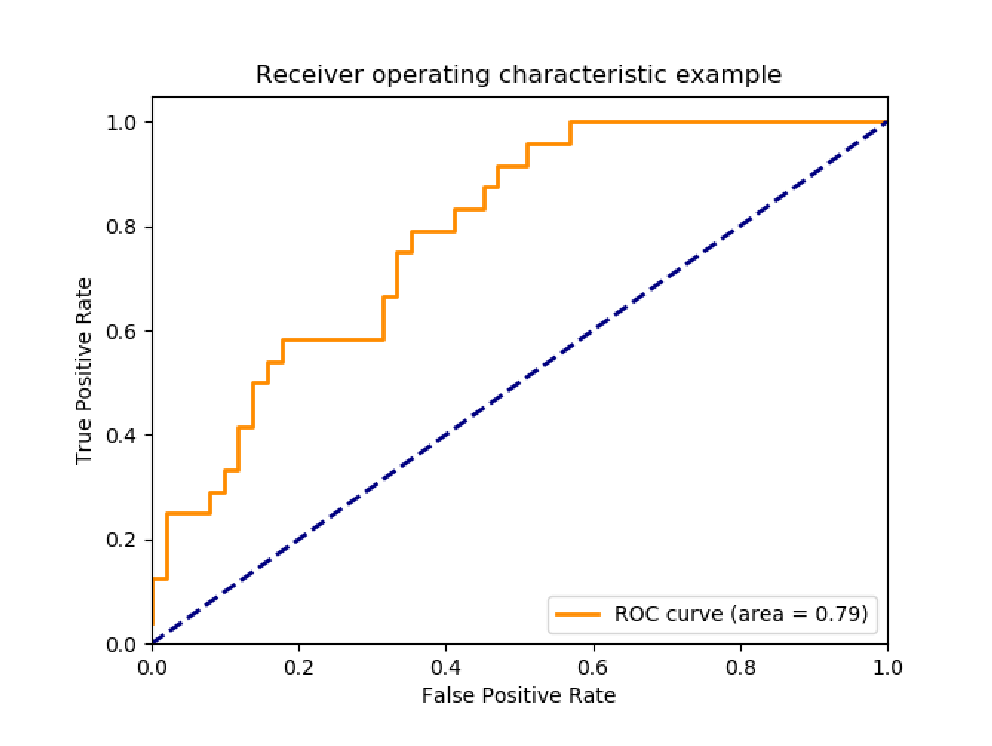

* True Positive Rate - Доля верных положительных классификаций $\frac{\sum_i[S(X_i) \ge \text{cut-off}, y_i = 1]}{\sum_i[y_i = 1]}$
* False Positive Rate - Доля ложных положительных классификаций
$\frac{\sum_i[S(X_i) < \text{cut-off}, y_i = 0]}{\sum_i[y_i = 0]}$

# Information Value

* IV (Information Value)  
  $IV = \int \left[\left(p_S(s|y=1) - p_S(s|y=0)\right)\ln\left(\frac{p_S(s|y=1)}{p_S(s|y=0)}\right) \right]$
  
* Оптимальное значение  
  $S(X) = \mathbb{P}(y = 1| X)$
  
* Оценка получается через оценки плотности для условных распределений.

# Свойства Information Value

* Не отрицательность  
  $IV \ge 0$
* Не увеличивается при преобразовании скор балла  
  $IV_{f(S)} \le IV_S$
* Аддитивность условно независимых признаков  
  $IV_{(x_1, ..., x_k)} = IV_{x_1} + ... + IV_{x_k}$, где $x_1, ..., x_k$ независимы при условии $y=1$ и $y=0$.

# Использование метрик
* Все рассмотренные метрики достигают оптимальных значений при $S(X) = \mathbb{P}(y = 1| X)$.
* Минимизировать удобнее log-loss.
* Если важен только порядок, в котором упорядочены объекты по степени принадлежности классам, то используем AUC, как критерий качества.
* Если нужно оценить предсказательную силу отдельного признака, то удобно использовать IV.
* В случае, если нужно производить оценку не зависящую от сбалансированности классов, то подходят AUC и IV.

# Проблема переобучения

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_underfitting_overfitting_001.png">

# Проблема переобучения

* Наша задача – поиск $S(X) = \mathbb{P}(y = 1| X)$.
* Поэтому мы будем минимизировать вероятностную характеристику:  
  $logloss = -\mathbb{E}[y \ln(S(X)) + (1-y)\ln(1 - S(X))]$
* Но по факту мы можем минимизировать только оценку:  
  $- \frac{1}{n}\sum_{i=1}^n[y_i \ln(S(X_i)) + (1-y_i)\ln(1 - S(X_i))]$
* При выборе функции, которая минимизирует оценку, пропадает ее несмещенность. Оценка становится “оптимистичнее”. И чем “шире” класс функций для поиска – тем выше “оптимистичность”.
* Чтобы получить несмещенную – можно использовать отложенную выборку, которая не использовалась в обучении для выбора функции.

# Схемы валидации
* Train/ Validate. В случае, если со временем меняется зависимость (распределение пар $(X_i, y_i)$), удобно использовать в качестве валидации самую последнюю часть выборки.

<center>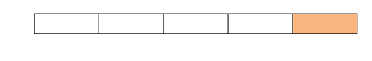</center>

* Cross-Validation. Позволяет повысить точность оценки качества предсказания за счет использования всей выборки для валидации. Хорошо подходит для детектирования маленьких улучшений модели.  

<center>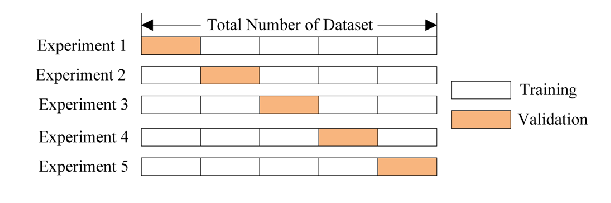</center>

# Наивный Байесовский Классификатор
* Путь набор признаков $X^1, ..., X^k$ независим при условии $y=1$ и $y=0$.  
  $$\mathbb{P}(X=x|y=1) = \mathbb{P}(X^1=x^1|y=1) \cdot ... \cdot \mathbb{P}(X^k=x^k|y=1)\\  
    \mathbb{P}(X=x|y=0) = \mathbb{P}(X^1=x^1|y=0) \cdot ... \cdot \mathbb{P}(X^k=x^k|y=0)$$
* Тогда с помощью формулы Байеса можно вывести формулу для вероятности события $y=1$ при условии $X$.  
  $$\mathbb{P}(y=1|X=x) = \frac{1}{1 + exp(-logit(x))},\\
  logit(x) = \ln\left(\frac{\mathbb{P}(y=1)}{\mathbb{P}(y=0)}\right) + WoE^1(x^1) + ... + WoE^k(x^k),\\
  WoE^j(x^j) = \ln\left(\frac{\mathbb{P}(X^j=x^j|y=1)}{\mathbb{P}(X^j=x^j|y=0)}\right).$$
  
* Для настройки классификатора достаточно оценить функции $WoE^j(x^j)$ или что то же самое, оценить условные плотности признаков.

# Логистическая регрессия

* Формула
  $$\mathbb{P}(y=1|X=x) = \frac{1}{1 + exp(-logit(x, w))},$$  
  $$logit(x, w) = w^0 + w^1 x^1 + ... w^k x^k$$  
* Минимизируем logloss на обучающей выборке, подбирая веса $w$.  

# Преобразование признаков
Для улучшение работы линейных моделей есть несколько техник нормализации признаков.

* Нормализация WoE.  
  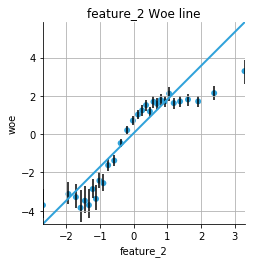  
  Вместо признака $x$ использовать $WoE(x)$, тогда класс линейных функций будет содержать наивный байесовский классификатор. 

# Преобразование признаков
* Преобразование Бокса-Кокса признаков к более нормальному распределению.
  $$x_{a, \lambda} = \begin{cases} \frac{(x + a)^{\lambda} - 1}{\lambda}, \lambda \ne 0 \\ log(x + a), \lambda = 0 \\ \end{cases}$$

# Регуляризация

Для борьбы с переобучением используются несколько стандартных способов регуляризации.

* Lasso (L1)  
  $\hat{w} = {argmin}_{w}\left(logloss + C \cdot |w|_1\right)$  
* Ridge (L2)  
  $\hat{w} = {argmin}_{w}\left(logloss + C \cdot |w|_2\right)$
* Elastic net  
  $\hat{w} = {argmin}_{w}\left(logloss + C_1 \cdot |w|_1 + C_2 \cdot |w|_2\right)$
* Статистический отбор признаков. Forward, Backward, Stepwise.

# Резюме
* Задача кредитного скоринга имеет ряд специфических свойств:
    * Долгосрочное прогнозирование
    * Предсказание поведения людей
    * Зависимость меняется со временем
* Различные метрики качества
    * Log-loss – удобен для оптимизации
    * AUC - подходит для критерия качества
    * IV – для оценки предсказательной силы признаков
* Выбор схемы валидации
    * Train/ Validate - при изменении зависимость во времени
    * Cross-Validation – для увеличения точности оценки и стабильной зависимости
* Логистическая регрессия
    * Обобщение Наивного Байесовского классификатора
    * Важна нормализация признаков в терминах WoE